# Uber Request Data

In [63]:
# Libraries for handling numeric computation and dataframes
import pandas as pd
import numpy as np

In [64]:
# Libraries for statistical plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read Uber dataset.csv.**

In [65]:
Uber  = pd.read_csv('D:/Uber Request Data.csv')

**Check the head of the DataFrame.**

In [66]:
Uber .head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


**Use the .info() method to find out how many entries there are.**

In [67]:
Uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


**Use the .isnull() method to find out ho null values.**

In [68]:
Uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

<AxesSubplot:>

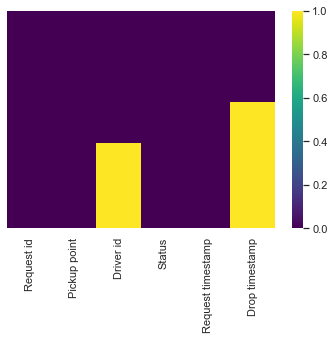

In [69]:
sns.heatmap(Uber.isnull(),yticklabels=False,cmap="viridis")


**Return the last n rows.**

In [70]:
Uber.tail()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


**How many columns and rows?**

In [71]:
# checking the shape i.e row and column
Uber.shape

(6745, 6)

In [72]:
# some import things like mean max check by describe
Uber.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


**Analyse the number of requests for all Trip Status ( Trip Completed, Cancelled and No Cars Available)**

Text(-2.3249999999999957, 0.5, 'Request Frequency')

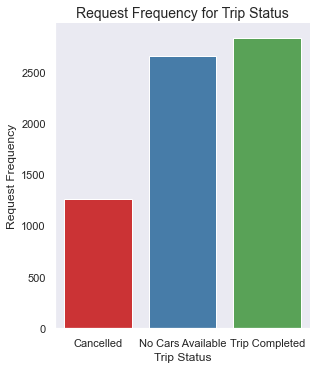

In [73]:
order_status = Uber['Status'].sort_values(ascending = True).unique().tolist()
plot = sns.catplot(x="Status", kind="count", data=Uber, palette="Set1", aspect= .9, order=order_status);

plt.title('Request Frequency for Trip Status', fontsize = 14)
plt.xlabel("Trip Status", fontsize = 12)
plt.ylabel("Request Frequency", fontsize = 12)

Above analysis we can easily see that "No cars available" status is more frequent than the number of trips "cancelled" status.

--------------

**Who has more requests, the city or the airport?**

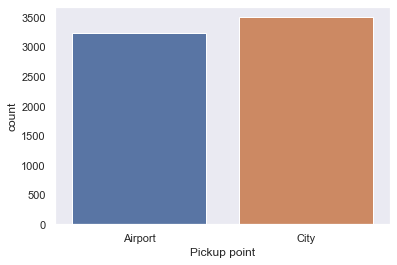

In [74]:
#Ploting a countplot of pickup point 
sns.set(style="dark")
ax = sns.countplot(x="Pickup point", data=Uber)
plt.show()

Above analysis shows that there are 2 pickup points i.e Airport And City are almost same,however city have slightly more requests than airport.

In [75]:
# Analyze Status and Pickup point.
Uber.groupby(['Status','Pickup point']).size()

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64